In [1]:
import numpy as np
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
import matplotlib as mpl
from scipy.integrate import odeint
from numpy import linalg as LA
from scipy.optimize import fsolve
from scipy.optimize import curve_fit
mpl.rcdefaults() 
from scipy.stats import uniform
import scipy.stats as st
from matplotlib import colors
from matplotlib import cm
import pandas as pd
import datetime
from mpl_toolkits.axes_grid1 import make_axes_locatable
import cartopy.crs as ccrs
import cartopy
import json
import xarray as xr
import pickle
from scipy.stats import linregress

jtplot.style(context='paper', fscale=1.4, spines=True, grid=False, ticks=True,gridlines='--')

fontsize=16
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True

mpl.rcParams['font.size'] = 16
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 'medium'
mpl.rcParams['axes.labelsize']= 'x-large'
mpl.rcParams['figure.facecolor']='white'

mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Arial']
hfont = {'fontname':'Arial'}

mpl.rcParams['text.latex.preamble']= r'\usepackage{amsmath}'
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e','#e6ab02','#a6761d','#666666']) 

## Open data

In [2]:
with open('matthew/JSON_data/Figure_AR6_CMIP5-6_AMOC_35N_1000m.json', 'r') as handle:
    json_load = json.load(handle)

amoc_c5_ts = np.ma.asarray(json_load["amoc_c5_ts"])  # Note the use of numpy masked arrays (np.ma)
amoc_c6_ts = np.ma.asarray(json_load["amoc_c6_ts"])
cmip5_models = json_load["cmip5_models"]
cmip6_models = json_load["cmip6_models"]
year = np.asarray(json_load["year"])

In [3]:
print(cmip6_models)

['AWI-CM-1-1-MR', 'BCC-CSM2-MR', 'BCC-ESM1', 'CAMS-CSM1-0', 'FGOALS-f3-L', 'FGOALS-g3', 'IITM-ESM', 'CanESM5', 'CNRM-CM6-1', 'CNRM-CM6-1-HR', 'CNRM-ESM2-1', 'E3SM-1-1', 'EC-Earth3', 'EC-Earth3-Veg', 'FIO-ESM-2-0', 'INM-CM4-8', 'INM-CM5-0', 'IPSL-CM6A-LR', 'MIROC6', 'HadGEM3-GC31-LL', 'HadGEM3-GC31-MM', 'UKESM1-0-LL', 'MPI-ESM1-2-HR', 'MRI-ESM2-0', 'GISS-E2-1-G', 'CESM2', 'CESM2-WACCM', 'NorESM1-F', 'NorESM2-LM', 'GFDL-AM4', 'GFDL-CM4', 'GFDL-ESM4', 'NESM3', 'SAM0-UNICON']


In [4]:
amoc6 = xr.DataArray(
    amoc_c6_ts,
    dims = ('models', 'experiments', 'ensemble-members', 'latitudes', 'time'),
    coords = dict(
        models      = cmip6_models,
        experiments = ['ssp119', 'ssp126', 'ssp245', 'ssp370', 'ssp585'],
        latitudes   = ['26.5N', '35N'],
        time        = year
        )
    )

In [10]:
imod = 0
iexp = 1
ilat = 0
iens = 0

In [11]:
np.nonzero(np.isnan(ensemble))

NameError: name 'ensemble' is not defined

In [12]:
ens_names = ['r{}i1p1f1'.format(i) for i in range(1,11)]

In [13]:
print(ens_names)

['r1i1p1f1', 'r2i1p1f1', 'r3i1p1f1', 'r4i1p1f1', 'r5i1p1f1', 'r6i1p1f1', 'r7i1p1f1', 'r8i1p1f1', 'r9i1p1f1', 'r10i1p1f1']


In [9]:
print('NUMBER OF NON-ZERO ENSEMBLES\n------------------------------')
model_list = []
enss = np.zeros((len(cmip6_models),10))
for imod, model in enumerate(cmip6_models):
    ensembles = np.array(amoc_c6_ts[imod,iexp,:,ilat,:],dtype=float)
    for iens,ensemble in enumerate(ensembles):
        if len(np.nonzero(np.isnan(ensemble))[0]) == len(ensemble):
            enss[imod,iens]=0
        else:
            enss[imod,iens]=1
df2 = pd.DataFrame(data=enss, columns=ens_names,index=cmip6_models)
display(df2)
df2.to_csv('ensemble_members.csv')

NUMBER OF NON-ZERO ENSEMBLES
------------------------------


NameError: name 'iexp' is not defined

In [31]:
print('NUMBER OF NON-ZERO ENSEMBLES\n------------------------------')
model_list = []
ensemblen_list = []
print('\n\n')
for imod, model in enumerate(cmip6_models):
    ensembles = np.array(amoc_c6_ts[imod,iexp,:,ilat,:],dtype=float)
    x = 0
    for ensemble in ensembles:
        if len(np.nonzero(np.isnan(ensemble))[0]) == len(ensemble):
            x=x+1
    if x != 10:
        model_list.append(model)
        ensemblen_list.append(10-x)
    print(model, ':\t',10-x)

NUMBER OF NON-ZERO ENSEMBLES
------------------------------



AWI-CM-1-1-MR :	 0
BCC-CSM2-MR :	 3
BCC-ESM1 :	 3
CAMS-CSM1-0 :	 2
FGOALS-f3-L :	 0
FGOALS-g3 :	 0
IITM-ESM :	 0
CanESM5 :	 10
CNRM-CM6-1 :	 10
CNRM-CM6-1-HR :	 1
CNRM-ESM2-1 :	 5
E3SM-1-1 :	 1
EC-Earth3 :	 5
EC-Earth3-Veg :	 5
FIO-ESM-2-0 :	 1
INM-CM4-8 :	 1
INM-CM5-0 :	 9
IPSL-CM6A-LR :	 10
MIROC6 :	 10
HadGEM3-GC31-LL :	 4
HadGEM3-GC31-MM :	 2
UKESM1-0-LL :	 10
MPI-ESM1-2-HR :	 10
MRI-ESM2-0 :	 5
GISS-E2-1-G :	 10
CESM2 :	 10
CESM2-WACCM :	 3
NorESM1-F :	 0
NorESM2-LM :	 3
GFDL-AM4 :	 0
GFDL-CM4 :	 1
GFDL-ESM4 :	 0
NESM3 :	 5
SAM0-UNICON :	 1


In [32]:
print(model_list,ensemblen_list)
for model in model_list:
    print(model)

['BCC-CSM2-MR', 'BCC-ESM1', 'CAMS-CSM1-0', 'CanESM5', 'CNRM-CM6-1', 'CNRM-CM6-1-HR', 'CNRM-ESM2-1', 'E3SM-1-1', 'EC-Earth3', 'EC-Earth3-Veg', 'FIO-ESM-2-0', 'INM-CM4-8', 'INM-CM5-0', 'IPSL-CM6A-LR', 'MIROC6', 'HadGEM3-GC31-LL', 'HadGEM3-GC31-MM', 'UKESM1-0-LL', 'MPI-ESM1-2-HR', 'MRI-ESM2-0', 'GISS-E2-1-G', 'CESM2', 'CESM2-WACCM', 'NorESM2-LM', 'GFDL-CM4', 'NESM3', 'SAM0-UNICON'] [3, 3, 2, 10, 10, 1, 5, 1, 5, 5, 1, 1, 9, 10, 10, 4, 2, 10, 10, 5, 10, 10, 3, 3, 1, 5, 1]
BCC-CSM2-MR
BCC-ESM1
CAMS-CSM1-0
CanESM5
CNRM-CM6-1
CNRM-CM6-1-HR
CNRM-ESM2-1
E3SM-1-1
EC-Earth3
EC-Earth3-Veg
FIO-ESM-2-0
INM-CM4-8
INM-CM5-0
IPSL-CM6A-LR
MIROC6
HadGEM3-GC31-LL
HadGEM3-GC31-MM
UKESM1-0-LL
MPI-ESM1-2-HR
MRI-ESM2-0
GISS-E2-1-G
CESM2
CESM2-WACCM
NorESM2-LM
GFDL-CM4
NESM3
SAM0-UNICON


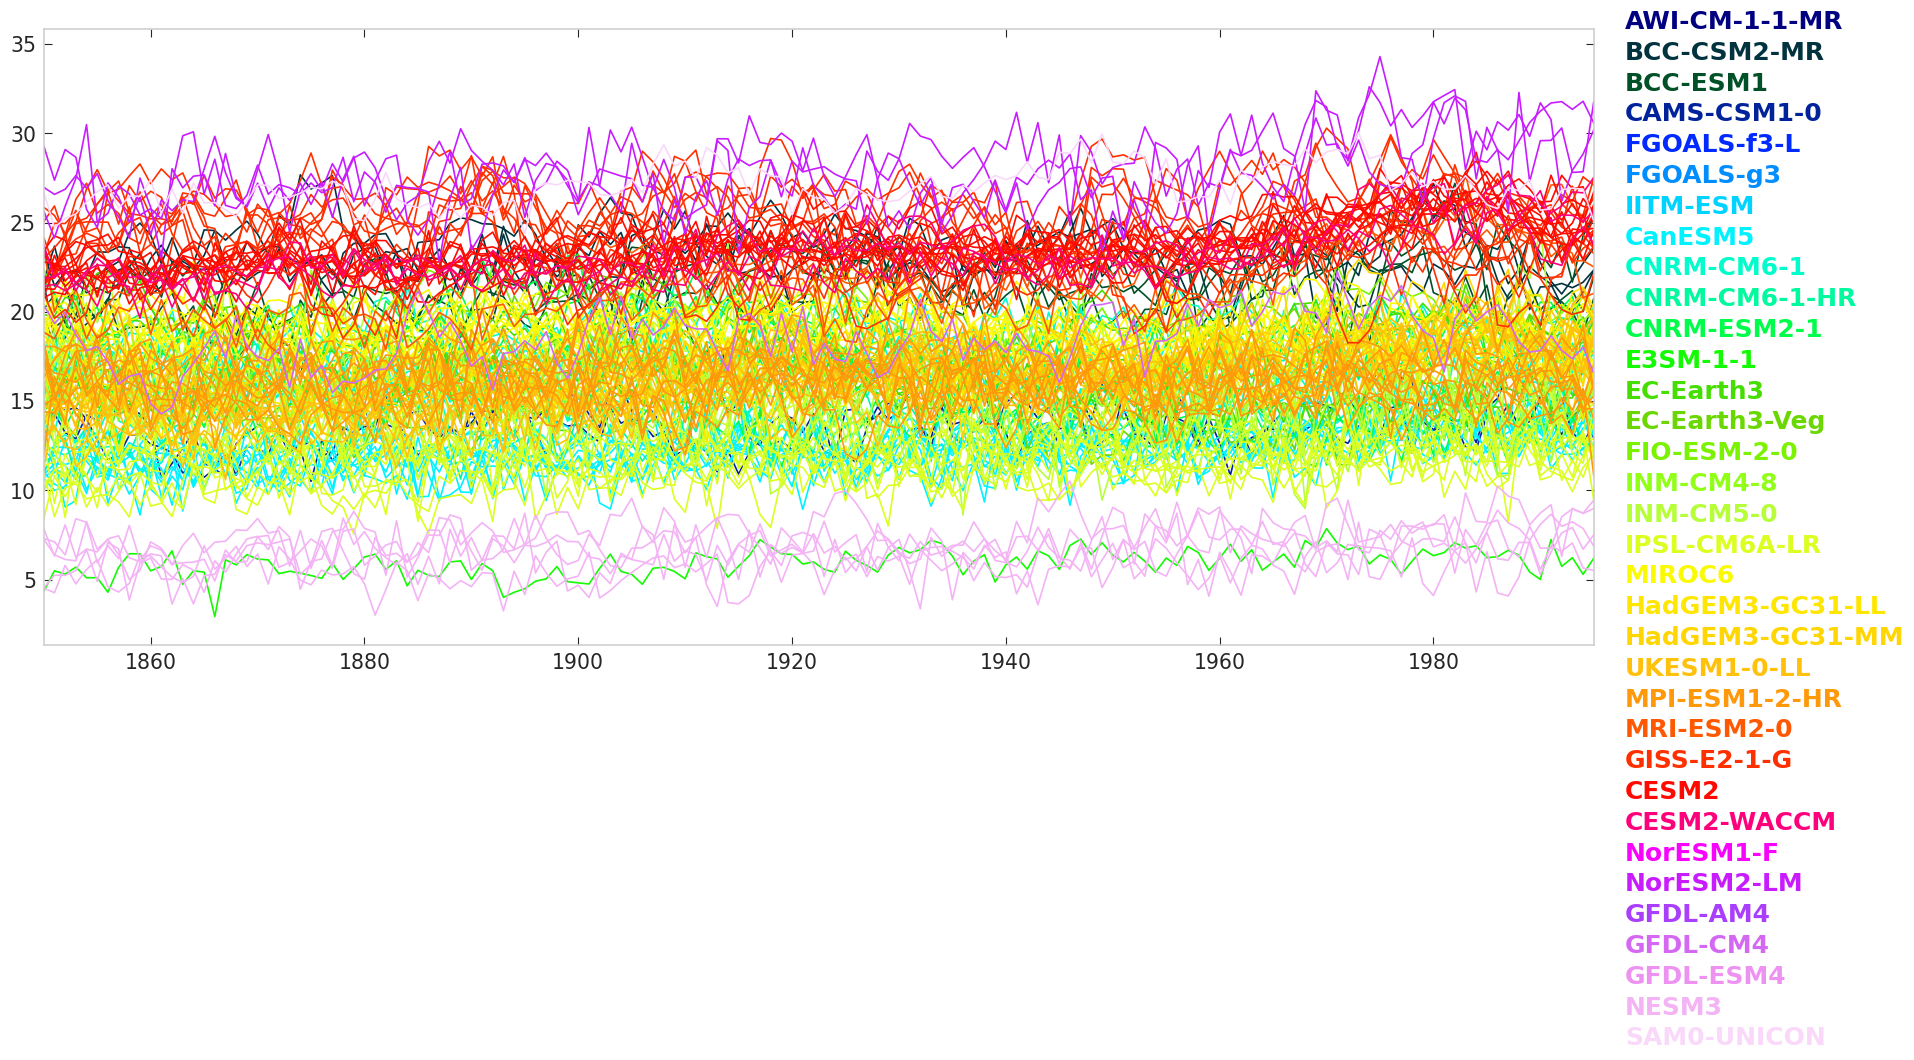

In [12]:
cmap = plt.get_cmap('gist_ncar')
color_list = [cmap(i/34) for i in np.arange(0,34)]

fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)
for imod in range(34):
    for iens in range(10):
        plt.plot(year, np.array(amoc_c6_ts[imod,iexp,iens,ilat,:],dtype=float),color=color_list[imod])
    ax.text(1.02, 1-0.05*imod, cmip6_models[imod], fontweight='bold', color=color_list[imod], transform=ax.transAxes, fontsize=fontsize+2)
ax.set_xlim(1850,1995)
plt.show()

## AMOC trend

In [13]:
time_idc1 = np.where((year>=1850)&(year<1985))

In [16]:
amoc_trend = np.zeros((34,10))
for imod in range(34):
    for iens in range(10):
        amc = np.array(amoc_c6_ts[imod,iexp,iens,ilat,time_idc1],dtype=float)[0]
        slope, intercept, r, p, se = linregress(year[time_idc1], amc)
        amoc_trend[imod,iens]=slope*100 # trend of Sv/century
amoc_trend = np.array(amoc_trend,dtype=float)

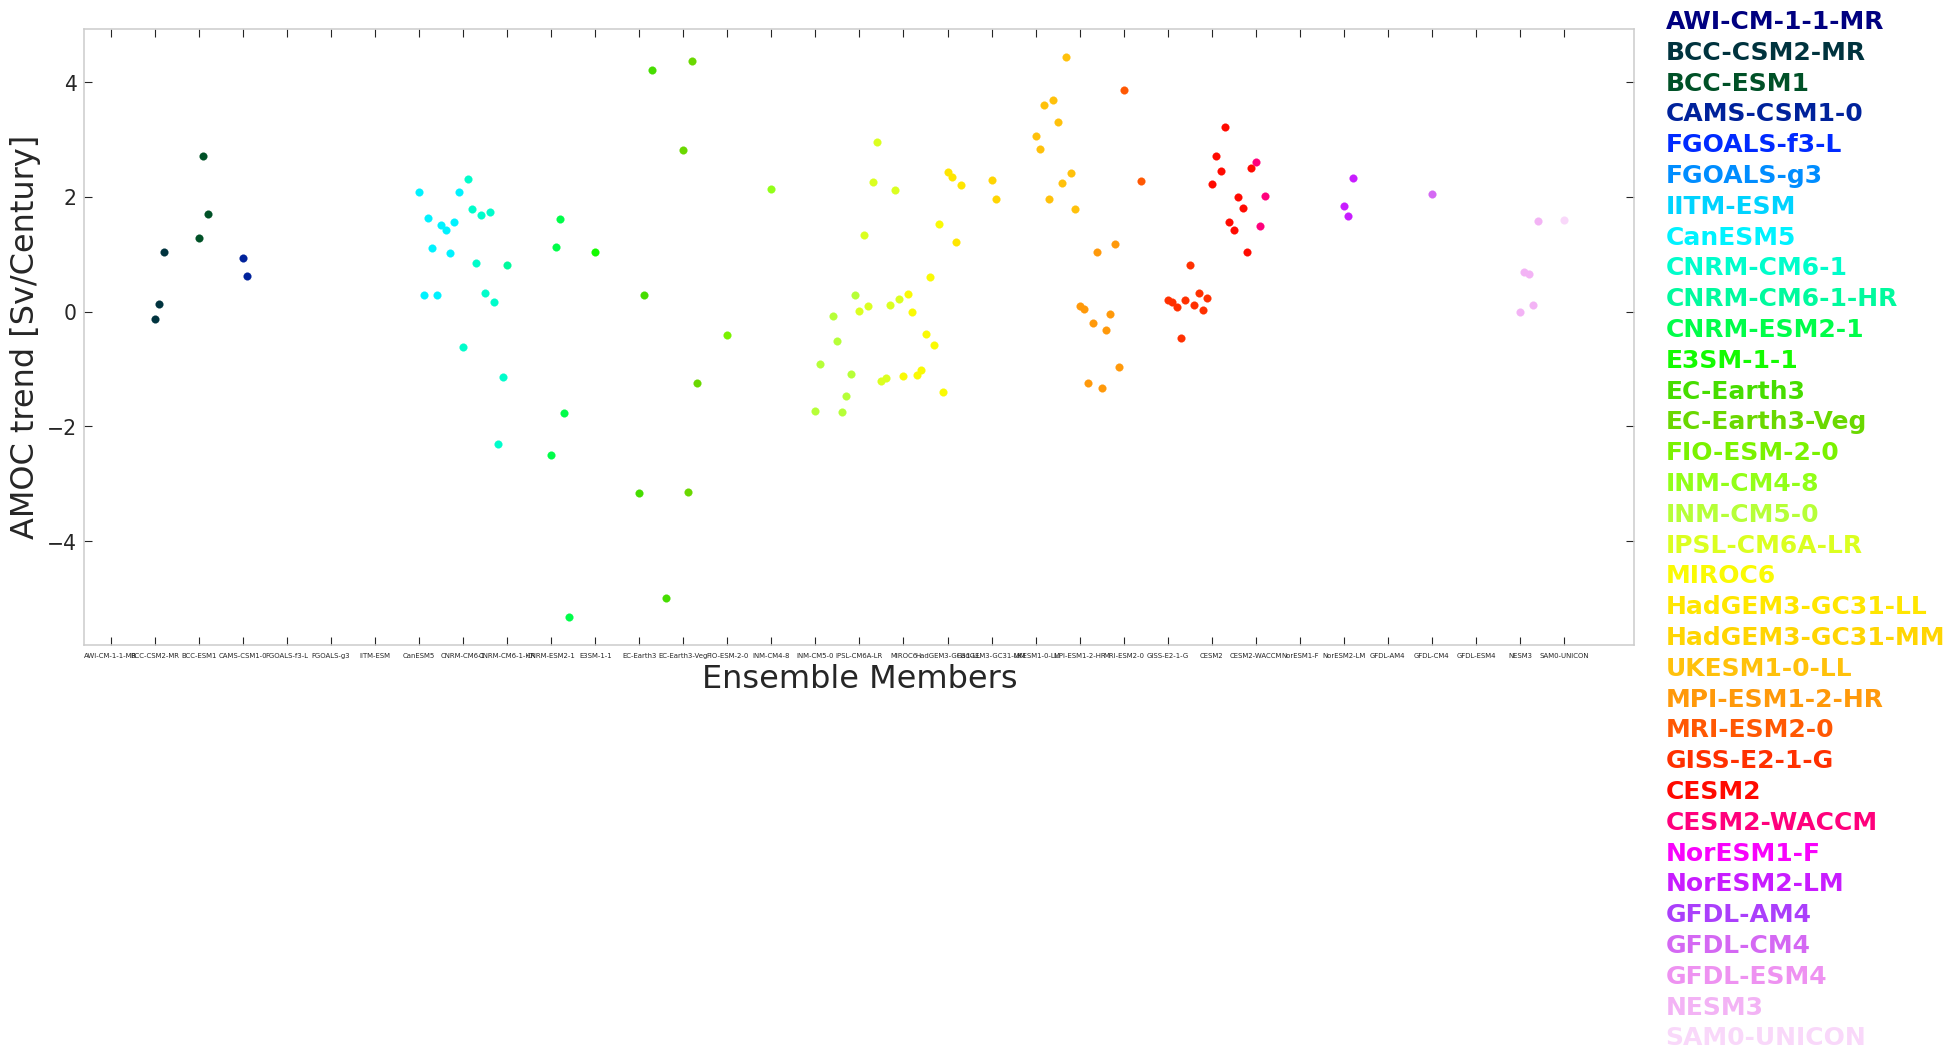

In [18]:
cmap = plt.get_cmap('gist_ncar')
color_list = [cmap(i/34) for i in np.arange(0,34)]

fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)
for imod in range(34):
    for iens in range(10):
        plt.scatter(imod*10+iens, amoc_trend[imod,iens],color=color_list[imod])
    ax.text(1.02, 1-0.05*imod, cmip6_models[imod], fontweight='bold', color=color_list[imod], transform=ax.transAxes, fontsize=fontsize+2)
plt.xticks(np.arange(0,34)*10,labels=cmip6_models,fontsize=5)
plt.ylabel('AMOC trend [Sv/Century]')
plt.xlabel('Ensemble Members')
plt.show()

In [19]:
amoc_trend_list = amoc_trend[~np.isnan(amoc_trend)].flatten()

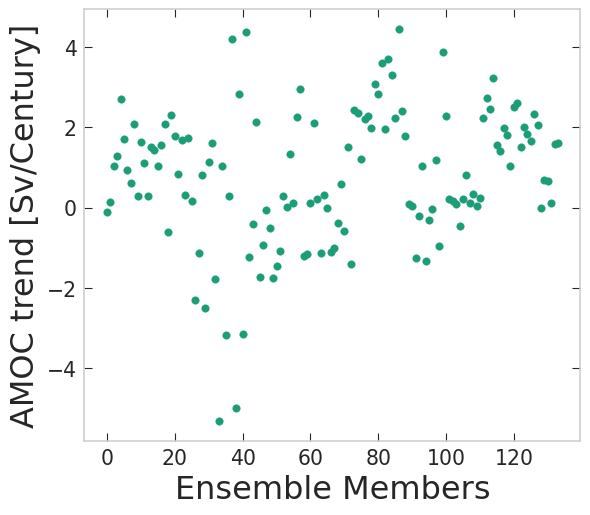

In [20]:
plt.scatter(range(0,len(amoc_trend_list)),amoc_trend_list)
plt.ylabel('AMOC trend [Sv/Century]')
plt.xlabel('Ensemble Members')
plt.show()

## SST Index